Анализ данных температуры окружающего воздуха
Используя встроенные функции работы с файлами *csv откроем файл "GlobalLandTemperaturesByCity.csv" и считаем с него все данные, относящиеся к России.
Данные запишем в список в формате [Дата, Город, Температура] 

In [29]:
import csv
russia = list()
with open('DataBase\GlobalLandTemperature\GlobalLandTemperaturesByCity.csv', newline='') as csvfile:
    tempdata = csv.reader(csvfile, delimiter=',')
    for row in tempdata:
        if 'Russia' in row:
            russia.append(list([row[0], row[3], row[1]]))
print(f'Считано {len(russia)} строк из файла')

Считано 461234 строк из файла


Далее будем работать с списком russia
Первым делом рассчитаем среднюю температуру на всей территории России по годам и запишем количество значений для каждого года, которое будет соответствовать количеству городов, для которых в указанную дату было известно значение температуры

Text(0, 0.5, 'Значение температуры')

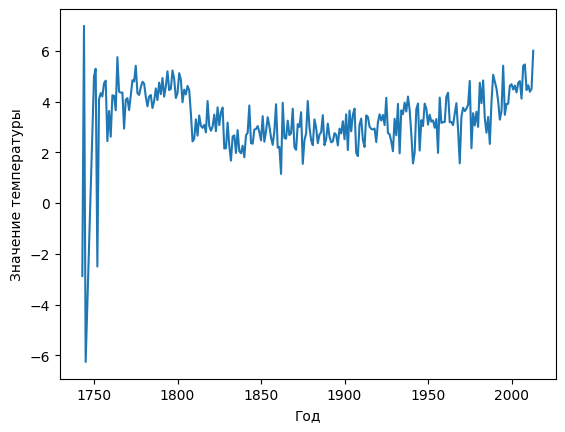

In [30]:
import matplotlib.pyplot as plt

temp_by_years_russia = {}
for row in russia:
    year = int(row[0].split('-')[0])
    if year in temp_by_years_russia.keys():
        if row[2]:
            val = temp_by_years_russia.get(year)
            temp_by_years_russia[year] = [(val[0] * val[1] + float(row[2])) / (val[1] + 1), val[1] + 1]
    else:
        if row[2]:
            temp_by_years_russia[year] = [float(row[2]), 1]

# выполним сортировку по ключу (по годам)
sorted_temp_tupple = sorted(temp_by_years_russia.items(), key=lambda x: x[0])
temp_by_years_russia = dict(sorted_temp_tupple)
# построим графики зависимости температуры от года
years = []
temp = []
for k in temp_by_years_russia.keys():
    years.append(k)
    temp.append(temp_by_years_russia.get(k)[0])
    
plt.plot(years, temp)

plt.xlabel('Год')
plt.ylabel('Значение температуры')

В задании требуется построить график изменения температуры в России по столетиям. 

[17, 18, 19, 20]


Text(0, 0.5, 'Значение температуры')

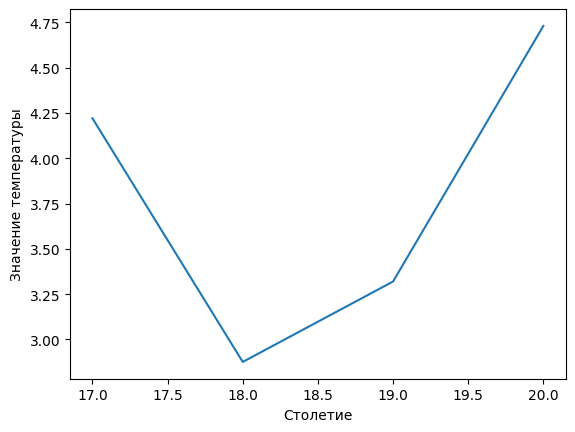

In [31]:
# построим график изменнения температуры в России по столетиям

temp_by_century_russia = {}
for k in temp_by_years_russia.keys():
    c = int(k / 100)
    if c in temp_by_century_russia:
        t = temp_by_century_russia.get(c)
        nt = temp_by_years_russia.get(k)
        temp_by_century_russia[c] = [(t[0]*t[1] + nt[0]*nt[1])/(t[1]+nt[1]),t[1]+nt[1]]
    else:
        temp_by_century_russia[c] = temp_by_years_russia.get(k)

century = []
temp = []
for k in temp_by_century_russia.keys():
    century.append(k)
    temp.append(temp_by_century_russia.get(k)[0])
    
print(century)
    
plt.plot(century, temp)

plt.xlabel('Столетие')
plt.ylabel('Значение температуры')

Далее необходимо рассчитать среднее значение температуры по столетиям для города Белгород.
Реализуем функцию, которая позволит получить статистику по годам, месяцам и по столетиям для любого города 

Text(0, 0.5, 'Значение температуры')

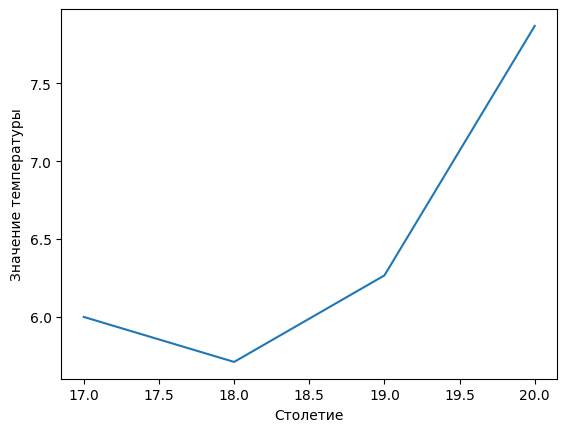

In [32]:
from datetime import date

def GetTempStatisticsForCity(tempdata, city):
    temp_by_years = {}
    temp_by_month = {}
    temp_by_day = {}
    for row in tempdata:
        ymd = row[0].split('-')
        year = int(ymd[0])
        month = int(ymd[1])
        day = int(ymd[1])
        if city == row[1]:
            # записи по годам
            if year in temp_by_years.keys():
                if row[2]:
                    val = temp_by_years.get(year)
                    temp_by_years[year] = [(val[0] * val[1] + float(row[2])) / (val[1] + 1), val[1] + 1]
            else:
                if row[2]:
                    temp_by_years[year] = [float(row[2]), 1]
            # записи по месяцам
            if month in temp_by_month.keys():
                if row[2]:
                    val = temp_by_month.get(month)
                    temp_by_month[month] = [(val[0] * val[1] + float(row[2])) / (val[1] + 1), val[1] + 1]
            else:
                if row[2]:
                    temp_by_month[month] = [float(row[2]), 1]
            # записи по дням
            temp_date = date.fromisoformat(row[0])
            if row[2]:
                temp_by_day[temp_date] = float(row[2])
    
    # выполним сортировку по ключу (по годам)
    sorted_temp_tupple = sorted(temp_by_years.items(), key=lambda x: x[0])
    temp_by_years = dict(sorted_temp_tupple)
    sorted_temp_tupple = sorted(temp_by_month.items(), key=lambda x: x[0])
    temp_by_month = dict(sorted_temp_tupple)
    
    temp_by_century = {}
    for k in temp_by_years.keys():
        c = int(k / 100)
        if c in temp_by_century:
            t = temp_by_century.get(c)
            nt = temp_by_years.get(k)
            temp_by_century[c] = [(t[0]*t[1] + nt[0]*nt[1])/(t[1]+nt[1]),t[1]+nt[1]]
        else:
            temp_by_century[c] = temp_by_years.get(k)
    
    return temp_by_day, temp_by_month, temp_by_years, temp_by_century

temp_by_day, temp_by_month, temp_by_years, temp_by_century = GetTempStatisticsForCity(russia, 'Belgorod')

century = []
temp = []
for k in temp_by_century.keys():
    century.append(k)
    temp.append(temp_by_century.get(k)[0])
    
plt.plot(century, temp)

plt.xlabel('Столетие')
plt.ylabel('Значение температуры')


Далее необходимо рассчитать максимальную и минимальную среднемесячную и годовую температуры для города Абакан. 

Минимальная среднемесячная температура в городе Abakan = -20.811145077720226 в 1
Максимальная среднемесячная температура в городе Abakan = 18.503538860103642 в 7


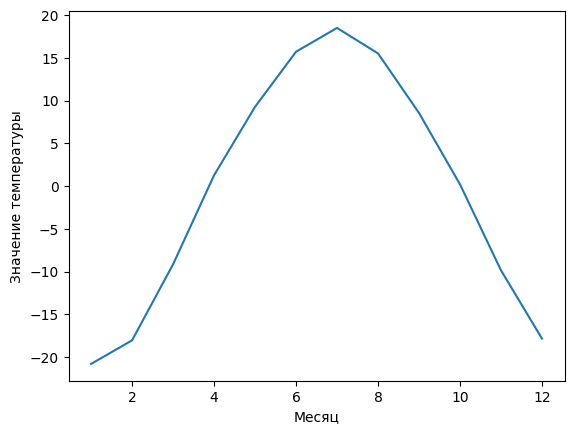

Минимальная годовая температура в городе Abakan = -2.777999999999999 в 1872
Максимальная годовая температура в городе Abakan = 2.6065833333333344 в 2007


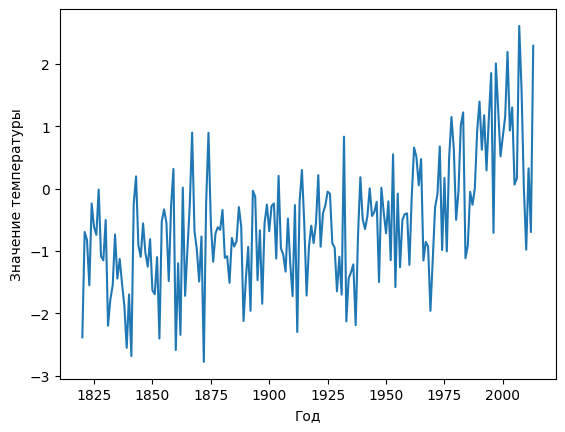

In [33]:
# Функция поиска минимальных и максимальных значений температуры (+ вывод графика)
def GetMinMaxTemp(tempdata, city, scale):
    if scale=='day':
        days = []
        temp = []
        for k in tempdata.keys():
            days.append(k)
            temp.append(tempdata.get(k))
        max_temp = max(temp)
        min_temp = min(temp)
        print(f'Минимальная температура в городе {city} = {min_temp} была зафиксирована в {days[temp.index(min_temp)]}')
        print(f'Максимальная температура в городе {city} = {max_temp} была зафиксирована в {days[temp.index(max_temp)]}')
        plt.plot(days, temp)
        plt.xlabel('Дата')
        plt.ylabel('Значение температуры')
        plt.show()
        
    if scale=='month':
        month = []
        temp = []
        for k in tempdata.keys():
            month.append(k)
            temp.append(tempdata.get(k)[0])
        max_temp = max(temp)
        min_temp = min(temp)
        print(f'Минимальная среднемесячная температура в городе {city} = {min_temp} в {month[temp.index(min_temp)]}')
        print(f'Максимальная среднемесячная температура в городе {city} = {max_temp} в {month[temp.index(max_temp)]}')
        plt.plot(month, temp)
        plt.xlabel('Месяц')
        plt.ylabel('Значение температуры')
        plt.show()
    
    if scale == 'year':
        years = []
        temp_tears = []
        for k in tempdata.keys():
            years.append(k)
            temp_tears.append(tempdata.get(k)[0])
        max_temp = max(temp_tears)
        min_temp = min(temp_tears)
        print(f'Минимальная годовая температура в городе {city} = {min_temp} в {years[temp_tears.index(min_temp)]}')
        print(f'Максимальная годовая температура в городе {city} = {max_temp} в {years[temp_tears.index(max_temp)]}')
        plt.plot(years, temp_tears)
        plt.xlabel('Год')
        plt.ylabel('Значение температуры')
        plt.show()

temp_by_day, temp_by_month, temp_by_years, temp_by_century = GetTempStatisticsForCity(russia, 'Abakan')
GetMinMaxTemp(temp_by_month, 'Abakan', 'month')
GetMinMaxTemp(temp_by_years, 'Abakan', 'year')


Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.  

Минимальная температура в городе Arkhangelsk = -22.188 была зафиксирована в 1985-01-01
Максимальная температура в городе Arkhangelsk = 18.252 была зафиксирована в 1960-07-01


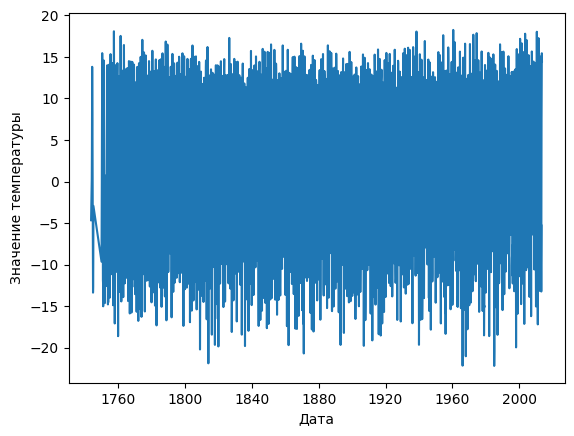

In [34]:
temp_by_day, temp_by_month, temp_by_years, temp_by_century = GetTempStatisticsForCity(russia, 'Arkhangelsk')
GetMinMaxTemp(temp_by_day, 'Arkhangelsk', 'day')

Построим график изменения температуры по всей России по годам

Text(0, 0.5, 'Значение температуры')

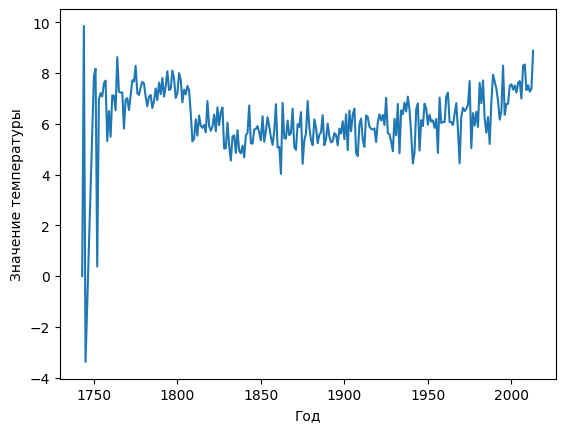

In [35]:
years = []
temp = []
temp_keys = list(temp_by_years_russia.keys())
temp_start = temp_by_years_russia.get(temp_keys[0])[0]
for k in temp_by_years_russia.keys():
    years.append(k)
    temp.append(temp_by_years_russia.get(k)[0] - temp_start)
    
plt.plot(years, temp)

plt.xlabel('Год')
plt.ylabel('Значение температуры')

Построим график изменения температуры по годам для города Благовещенск

Text(0, 0.5, 'Значение температуры')

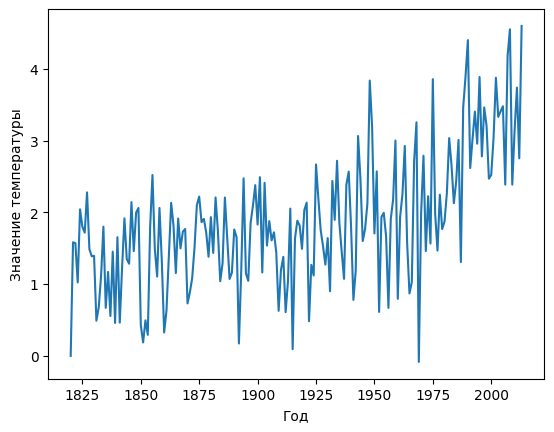

In [36]:
temp_by_day, temp_by_month, temp_by_years, temp_by_century = GetTempStatisticsForCity(russia, 'Blagoveshchensk')
years = []
temp = []
temp_keys = list(temp_by_years.keys())
temp_start = temp_by_years.get(temp_keys[0])[0]
for k in temp_by_years.keys():
    years.append(k)
    temp.append(temp_by_years.get(k)[0] - temp_start)
    
plt.plot(years, temp)
plt.xlabel('Год')
plt.ylabel('Значение температуры')

Рассчитаем среднюю месячную температуры для России за все время измерений и построим гистограмму распределения.
Для этого создадим функцию с построением гистрограммы распределения

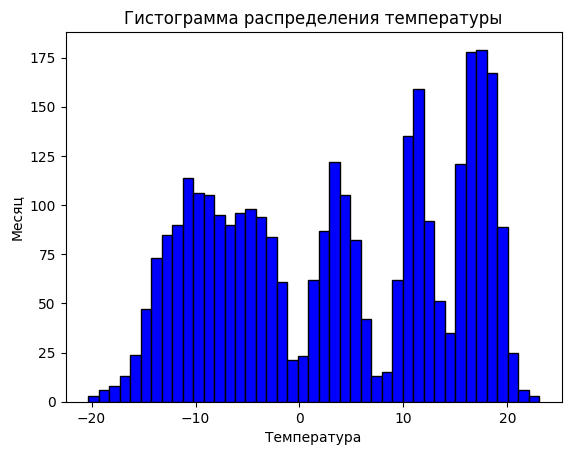

In [37]:
# Функция построения гистограммы распределения значений температуры
def GetTempHistogram(tempdata, city):
    temp_by_month = {}
    for row in tempdata:
        temp_date = date.fromisoformat(row[0])
        if (city == row[1]) or len(city)==0:
            # записи по месяцам
            if temp_date in temp_by_month.keys():
                if row[2]:
                    val = temp_by_month.get(temp_date)
                    temp_by_month[temp_date] = [(val[0] * val[1] + float(row[2])) / (val[1] + 1), val[1] + 1]
            else:
                if row[2]:
                    temp_by_month[temp_date] = [float(row[2]), 1]
    temp_values = []
    for k in temp_by_month.keys():
        temp_values.append(temp_by_month.get(k)[0])
    min_temp = min(temp_values)
    max_temp = max(temp_values)
    plt.hist(temp_values, color = 'blue', edgecolor = 'black', bins = int(max_temp - min_temp))
    plt.title('Гистограмма распределения температуры')
    plt.xlabel('Количество зафиксированных значений')
    plt.ylabel('Месяц')
    plt.show()


GetTempHistogram(russia, '')

То же самое необходимо сделать для города Батайск

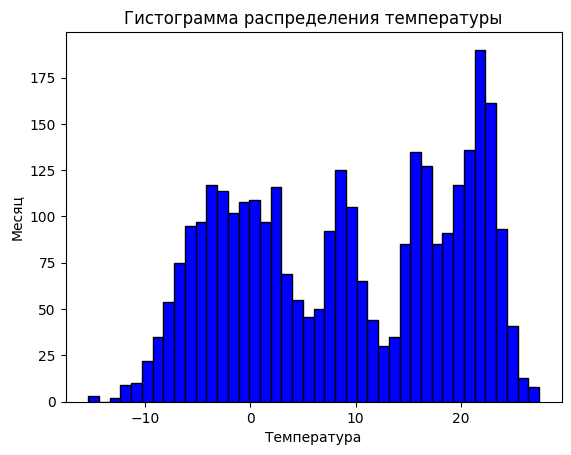

In [38]:
GetTempHistogram(russia, 'Bataysk')